In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-poster')
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import glob
import matplotlib.dates as mdates
import datetime
import dask.array as da

In [2]:
trackdat = "../data/track_data/JOSE_2017"

In [3]:
df = pd.read_csv(trackdat, skiprows=1)
hermlen = len(df[df.columns[0]])

hurrnum = np.ones(hermlen)
for i in range(hermlen):
    yearmoda = str(df[df.columns[0]][i])
    hours    = int(df[df.columns[1]][i]/100)
    dateform = datetime.datetime(int(yearmoda[:4]), int(yearmoda[4:6]), int(yearmoda[6:]), hours)
    hurrnum[i] = mdates.date2num(dateform)

latsN, lonsN = df.columns[4], df.columns[5]

hurrlats = [float(df[latsN][i][:-1]) for i in range(len(df[df.columns[0]]))]
hurrlons = [-float(df[lonsN][i][:-1]) for i in range(len(df[df.columns[0]]))]

In [4]:
dataloc = "http://tds.marine.rutgers.edu/thredds/dodsC/cool/glider/all/striper-20170907T1430.ncCFMA.nc3.nc"

In [5]:
df = xr.open_dataset(dataloc, decode_times=False)

In [6]:
df

<xarray.Dataset>
Dimensions:          (obs: 152, profile: 5833, trajectory: 1)
Coordinates:
  * trajectory       (trajectory) |S64 b'striper-20170907T1430'
    time             (trajectory, profile) float64 ...
    latitude         (trajectory, profile) float64 ...
    longitude        (trajectory, profile) float64 ...
    time_uv          (trajectory, profile) float64 ...
    lat_uv           (trajectory, profile) float64 ...
    lon_uv           (trajectory, profile) float64 ...
    depth            (trajectory, profile, obs) float32 ...
Dimensions without coordinates: obs, profile
Data variables:
    wmo_id           (trajectory) |S64 ...
    profile_id       (trajectory, profile) float64 ...
    u                (trajectory, profile) float64 ...
    v                (trajectory, profile) float64 ...
    precise_time     (trajectory, profile, obs) float64 ...
    pressure         (trajectory, profile, obs) float32 ...
    temperature      (trajectory, profile, obs) float32 ...
    conductivity     (trajectory, profile, obs) float32 ...
    salinity         (trajectory, profile, obs) float32 ...
    density          (trajectory, profile, obs) float32 ...
    precise_lat      (trajectory, profile, obs) float64 ...
    precise_lon      (trajectory, profile, obs) float64 ...
    platform_meta    (trajectory, profile, obs) float32 ...
    instrument_ctd   (trajectory, profile, obs) float32 ...
    precise_time_qc  (trajectory, profile, obs) float32 ...
    depth_qc         (trajectory, profile, obs) float32 ...
    pressure_qc      (trajectory, profile, obs) float32 ...
    temperature_qc   (trajectory, profile, obs) float32 ...
    conductivity_qc  (trajectory, profile, obs) float32 ...
    salinity_qc      (trajectory, profile, obs) float32 ...
    density_qc       (trajectory, profile, obs) float32 ...
    precise_lat_qc   (trajectory, profile, obs) float32 ...
    precise_lon_qc   (trajectory, profile, obs) float32 ...
    time_qc          (trajectory, profile, obs) float32 ...
    latitude_qc      (trajectory, profile, obs) float32 ...
    longitude_qc     (trajectory, profile, obs) float32 ...
    time_uv_qc       (trajectory, profile, obs) float32 ...
    lat_uv_qc        (trajectory, profile, obs) float32 ...
    lon_uv_qc        (trajectory, profile, obs) float32 ...
    u_qc             (trajectory, profile, obs) float32 ...
    v_qc             (trajectory, profile, obs) float32 ...
Attributes:
    acknowledgment:                This deployment supported by United States...
    cdm_data_type:                 TrajectoryProfile
    cdm_profile_variables:         time_uv,lat_uv,lon_uv,u,v,profile_id,time,...
    cdm_trajectory_variables:      trajectory,wmo_id
    contributor_name:              Bill Boicourt, Chip Haldeman, David Aragon...
    contributor_role:              Primary Investigator, Glider Pilot, Glider...
    Conventions:                   Unidata Dataset Discovery v1.0, COARDS, CF...
    creator_email:                 kerfoot@marine.rutgers.edu
    creator_name:                  John Kerfoot
    creator_url:                   http://rucool.marine.rutgers.edu
    date_created:                  2017-09-27T05:07:59Z
    date_issued:                   2017-09-27T05:07:59Z
    defaultGraphQuery:             longitude,latitude,time&.draw=linesAndMark...
    Easternmost_Easting:           -73.22953328670195
    featureType:                   TrajectoryProfile
    format_version:                /tmp/IOOS_Glider_NetCDF_v2.0-qartod.nc
    geospatial_lat_max:            39.46009896384581
    geospatial_lat_min:            37.55140806644617
    geospatial_lat_units:          degrees_north
    geospatial_lon_max:            -73.22953328670195
    geospatial_lon_min:            -75.42070085025851
    geospatial_lon_units:          degrees_east
    geospatial_vertical_max:       95.83
    geospatial_vertical_min:       1.11
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    history:         

In [8]:
from geopy.distance import geodesic

glats = np.squeeze(df.latitude.values)
glons = np.squeeze(df.longitude.values)

distance_metric = np.ones((np.size(glats),np.size(hurrlats)))
for i, glatitude in enumerate(glats):
    for j, hlatitude in enumerate(hurrlats):
        glider_LL = (glatitude, glons[i])
        hurr_ll   = (hlatitude, hurrlons[j])
        distance_metric[i,j] = geodesic(glider_LL, hurr_ll).miles

b = np.amin(distance_metric)
print(b)
ktime = np.where(distance_metric == b)[1][0]
eyepassage = hurrnum[ktime]
eyepassage

In [9]:
time_origin = datetime.datetime(1970,1,1)
datenum = np.ones_like(df.depth.values)
dlen    = np.shape(df.depth)[2]
for i, sec in enumerate(df.time.values[0,:]):
    datetmp   = time_origin + datetime.timedelta(seconds = sec)
    datenum[0,i,:] = mdates.date2num(datetmp)*np.ones(dlen)

In [10]:
start = mdates.date2num(datetime.datetime(2017,9,17))
enddd = mdates.date2num(datetime.datetime(2017,9,21))

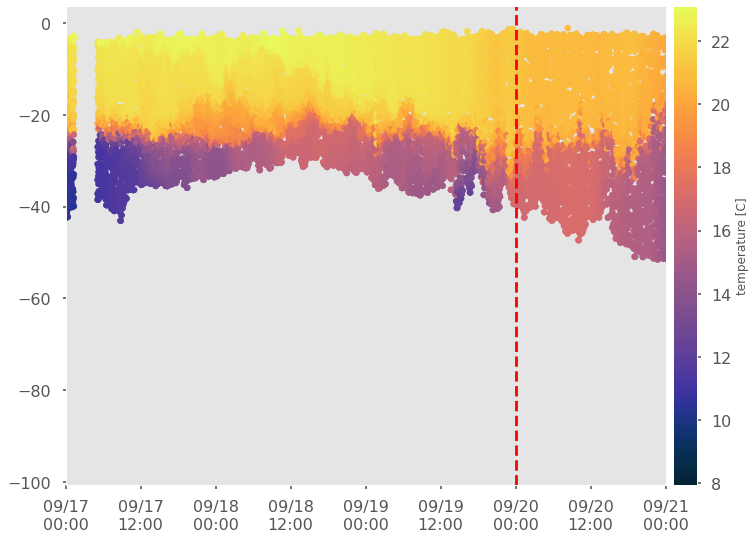

In [14]:
plt.scatter(datenum[0,:,:], -df.depth[0,:,:], c=df.temperature[0,:,:], s=36, cmap=cmo.thermal)
plt.colorbar(pad=0.01, label="temperature [C]")
myFmt = mdates.DateFormatter('%m/%d\n%H:%M')
plt.xlim([start, enddd])
plt.axvline(x = eyepassage, c='r', linestyle="--")
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid()
plt.show()

In [17]:
def discrete_to_grid(times_in,depth_in,variable,times_grid,depths_grid):
    from scipy.interpolate import interp1d
    N = len(times_in)
    time_array = times_grid[:,0]
    deptharray = depths_grid[0,:]
    var_out = np.ones_like(times_grid)
    # loop over index of input coordinates
    dT = 1/24/2.5
    for j, T in enumerate(time_array):
        # centre coordinates on estimation point
        #print(T, times_in.shape)
        lowC = times_in > T-dT
        hiC  = times_in < T+dT
        q = np.logical_and(lowC,hiC)
        dep = depth_in[q]
        var = variable[q]
        #print(np.shape(var))
        f = interp1d(dep,var,kind='linear')
        tmp = np.ones_like(deptharray)*np.nan
        q_less = np.where(deptharray<np.nanmax(dep))
        q_more = np.where(deptharray>np.nanmin(dep))
        q = np.intersect1d(q_more,q_less)
        dtmp = deptharray[q]
        tmp[q] = f(deptharray[q])
        var_out[j,:] = tmp    
    return var_out

times = datenum[0,:,0]
depth = np.arange(1,60,2)
DEPTH, TIMES = np.meshgrid(depth,times)
TEMPS = discrete_to_grid(datenum[0,:,:].reshape(-1), df.depth[0,:,:].values.reshape(-1), df.temperature[0,:,:].values.reshape(-1),TIMES, DEPTH)

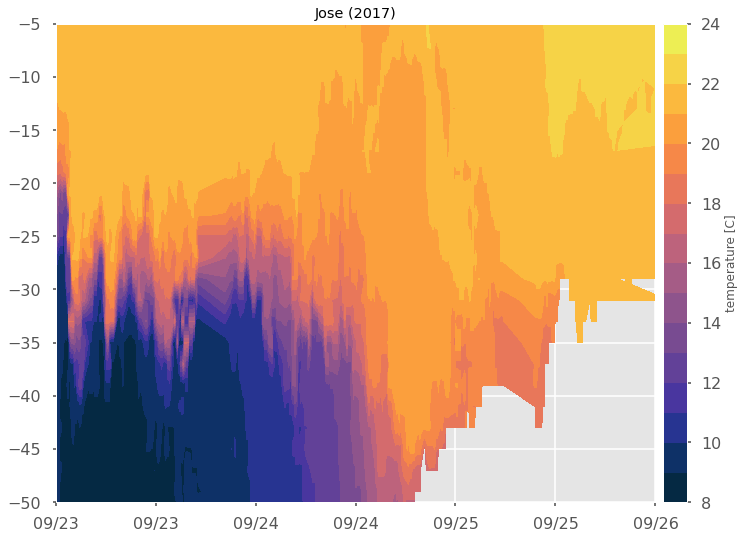

In [65]:
plt.contourf(TIMES,-DEPTH,TEMPS, cmap='cmo.thermal', levels=np.linspace(8,24,17))
plt.colorbar(pad=0.01, label="temperature [C]")
plt.ylim([-50,-5])
plt.xlim([start+1, enddd])
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title('Jose (2017)')
plt.savefig("FIGS/temperatures_Jose2017.pdf", bbox_inches='tight')
plt.show()

In [53]:
st = mdates.date2num(datetime.datetime(2017,9,22))
en = mdates.date2num(datetime.datetime(2017,9,24))

a = times < en
b = times > st
q = np.logical_and(a,b)
temps_before = TEMPS[q,:]
temps_before = np.nanmean(temps_before, axis=(0))

/Users/cew145/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


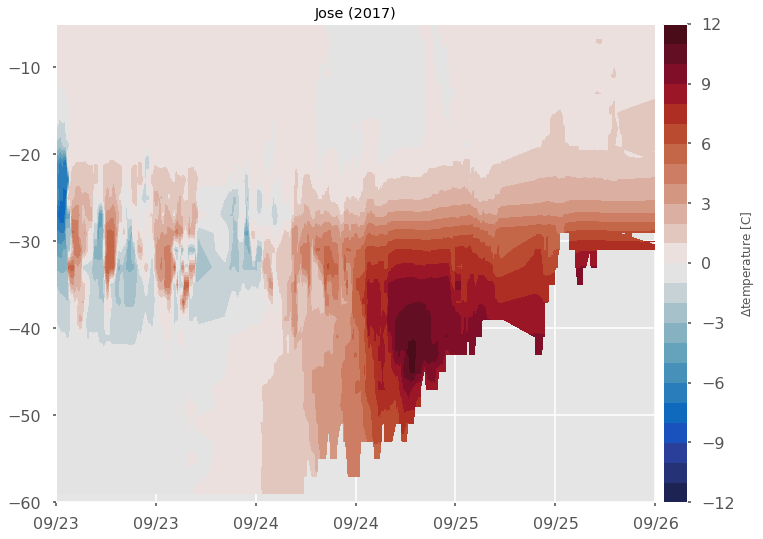

In [67]:
plt.contourf(TIMES,-DEPTH,TEMPS-temps_before[np.newaxis,:], cmap='cmo.balance', levels=np.linspace(-12,12,25))
plt.colorbar(pad=0.01, label="$\Delta$temperature [C]")
plt.ylim([-60,-5])
plt.xlim([start+1, enddd])
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title('Jose (2017)')
plt.savefig("FIGS/dT_Jose2017.pdf", bbox_inches='tight')
plt.show()